# Лабораторная работа №2

ФИО: **Павленко Алексей**
Группа: **Бивт-21-3**

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

**## Пункт 1 (Пример импорта данных)**

In [ ]:
# data = pd.read_csv(path_to_dataset, sep='\t')  # если нужно, можно поменять разделитель
#  numpy уже импортирован в colab
import math
import os
import pandas as pd
#from google.colab import files
#uploaded = files.upload()
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
data = pd.read_csv('Application_Data.csv', sep=',')
print(data.head())

   Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
0       5008806          M                1             1               0   
1       5008808          F                0             1               0   
2       5008809          F                0             1               0   
3       5008810          F                0             1               0   
4       5008811          F                0             1               0   

   Total_Income                                        Income_Type  \
0        112500  Working                                       ...   
1        270000  Commercial associate                          ...   
2        270000  Commercial associate                          ...   
3        270000  Commercial associate                          ...   
4        270000  Commercial associate                          ...   

                                      Education_Type  \
0  Secondary / secondary special                 ...   
1  S

**## Пункт 2 (Описание постановки задачи)**

**Описание:**

Исследование направлено на анализ данных. Этот набор данных состоит из показатей, полученных на добровольной основе о клиентах, имеющих желание создать кредитную карту.

**Независимые переменные:**
'Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
'Total_Bad_Debt', 'Total_Good_Debt'

**Зависимая переменная (Целевое событие):**

'Status' - Переменная булевой логики, отображающая решение банка, о допуске или отказе клиенту в желании создать кредитную карту.

##**Пункт 2 (Целевая функция)**

Целевая функция - на основе полученных данных, спрогнозировать одобрение/отклонение создания кредитной карты.

In [ ]:
print(data.columns)
num_columns = data.shape[1]
print(num_columns)

Index(['Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
       'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
       'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
       'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'Status'],
      dtype='object')
21


##**Пункт 3 (Распределение целевой переменной)**

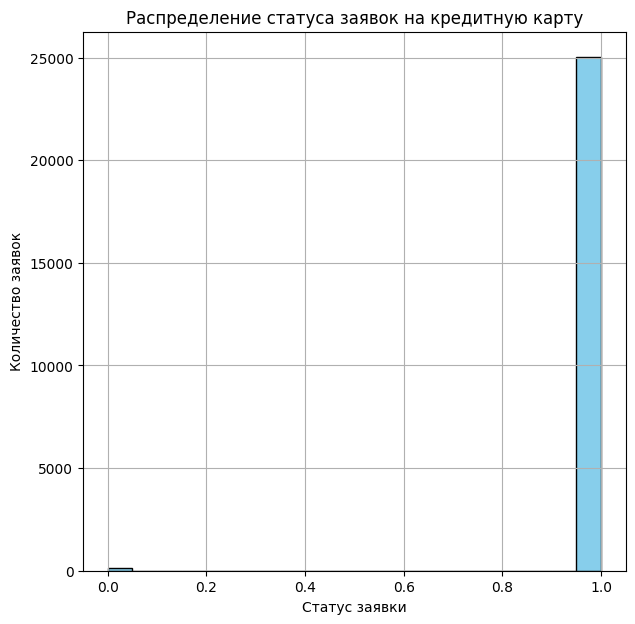

Количество уникальных значений целевой переменной 'Status': 2
Наиболее часто встречающееся значение: 1 Количество: 25007


In [ ]:
plt.figure(figsize=(7, 7))
plt.hist(data['Status'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение статуса заявок на кредитную карту')
plt.xlabel('Статус заявки')
plt.ylabel('Количество заявок')
plt.grid(True)
plt.show()

# Подсчет количества уникальных значений целевой переменной 'Status'
unique_values = data['Status'].nunique()
print("Количество уникальных значений целевой переменной 'Status':", unique_values)

# Подсчет количества заявок для каждого статуса
value_counts = data['Status'].value_counts()
print('Наиболее часто встречающееся значение:', value_counts.idxmax(), 'Количество:', value_counts.max())

##**Пункт 4 (Основные показатели датасета)**

In [ ]:
statistics = data.describe()
print(statistics)

       Applicant_ID     Owned_Car  Owned_Realty  Total_Children  Total_Income  \
count  2.512800e+04  25128.000000  25128.000000    25128.000000  2.512800e+04   
mean   5.078835e+06      0.418378      0.654927        0.509472  1.948365e+05   
std    4.194378e+04      0.493303      0.475402        0.762937  1.045211e+05   
min    5.008806e+06      0.000000      0.000000        0.000000  2.700000e+04   
25%    5.042226e+06      0.000000      0.000000        0.000000  1.350000e+05   
50%    5.079004e+06      0.000000      1.000000        0.000000  1.800000e+05   
75%    5.115603e+06      1.000000      1.000000        1.000000  2.250000e+05   
max    5.150487e+06      1.000000      1.000000        5.000000  1.575000e+06   

       Owned_Mobile_Phone  Owned_Work_Phone   Owned_Phone   Owned_Email  \
count             25128.0      25128.000000  25128.000000  25128.000000   
mean                  1.0          0.273758      0.292741      0.100684   
std                   0.0          0.445895  

##**Пункт 5 (Общая информация о датасете)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

##**Пункт 6 (Проверка датасета на потерю данных)**

In [ ]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64


##**Пункт 7 (Составление гистограммы для пяти признаков)**


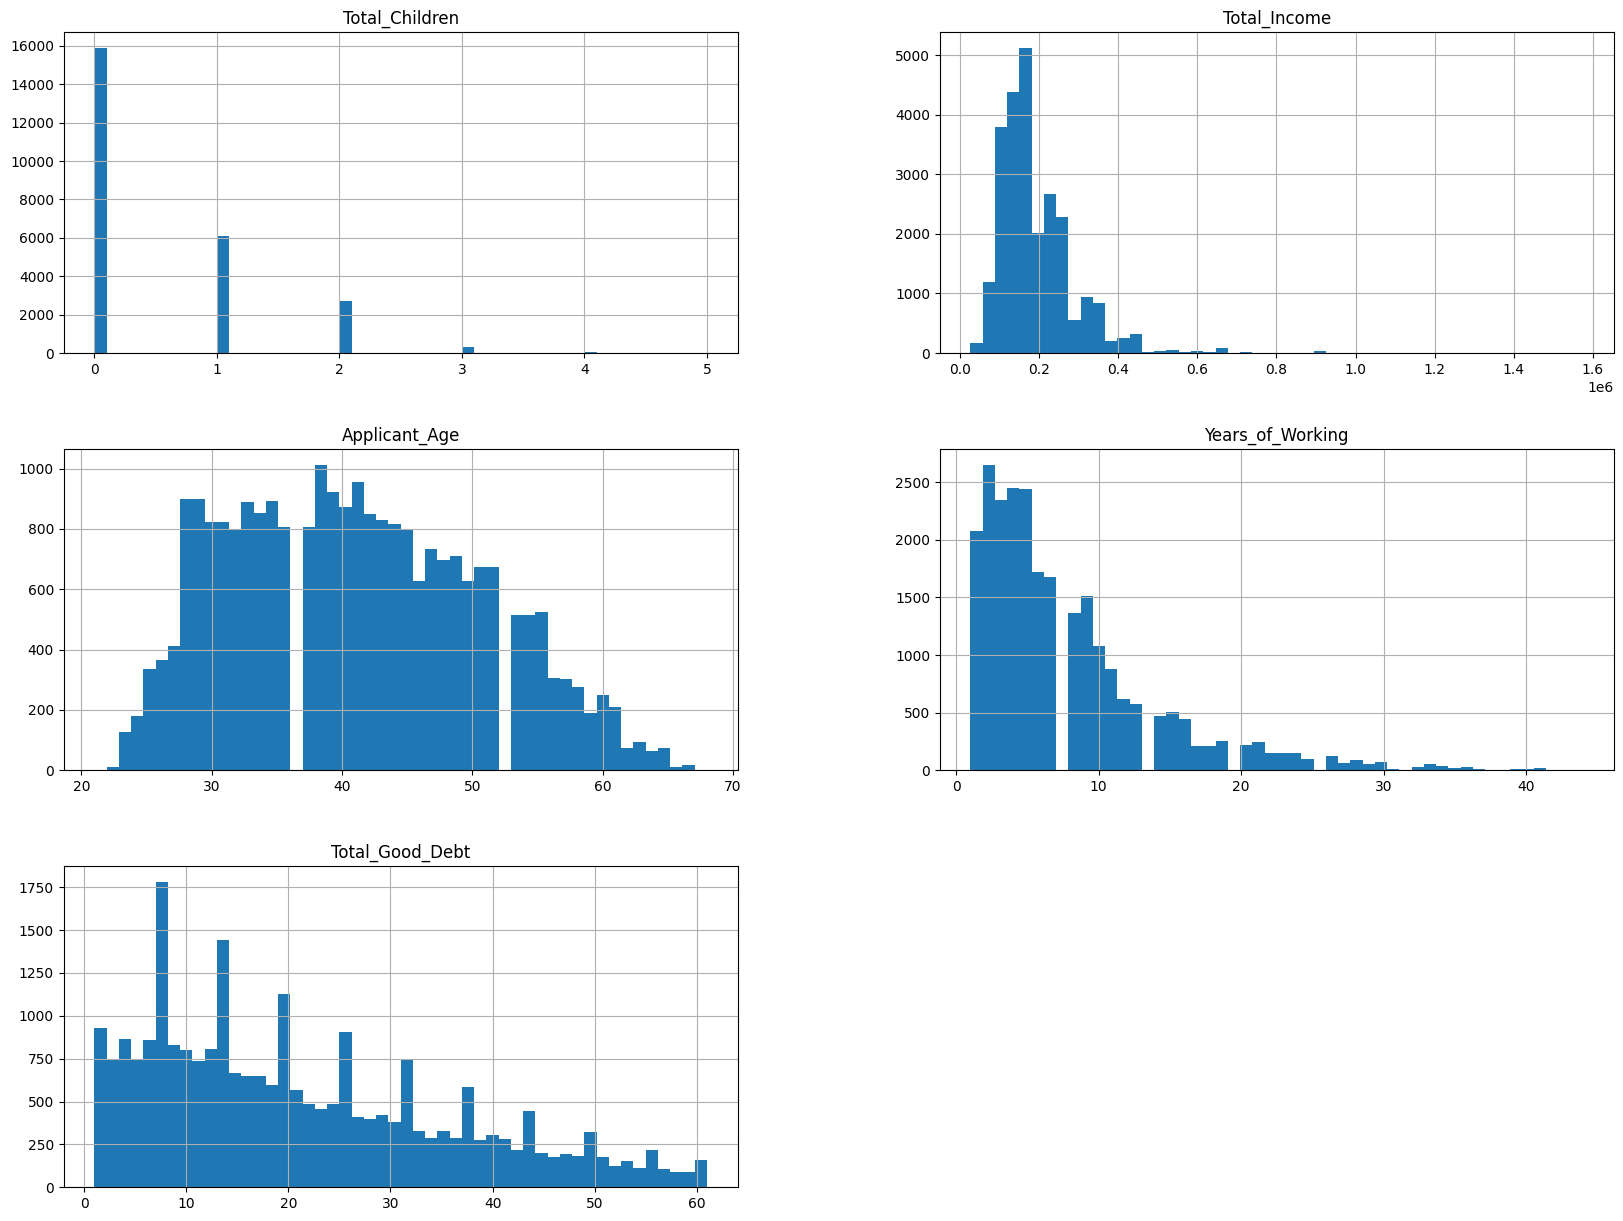

In [ ]:
numerical_columns = ['Total_Children', 'Total_Income', 'Applicant_Age', 'Years_of_Working', 'Total_Good_Debt']
data[numerical_columns].hist(bins=50, figsize=(20, 15))
plt.show()

##**Пункт 8 (Зависимость переменных и целевой функции )**


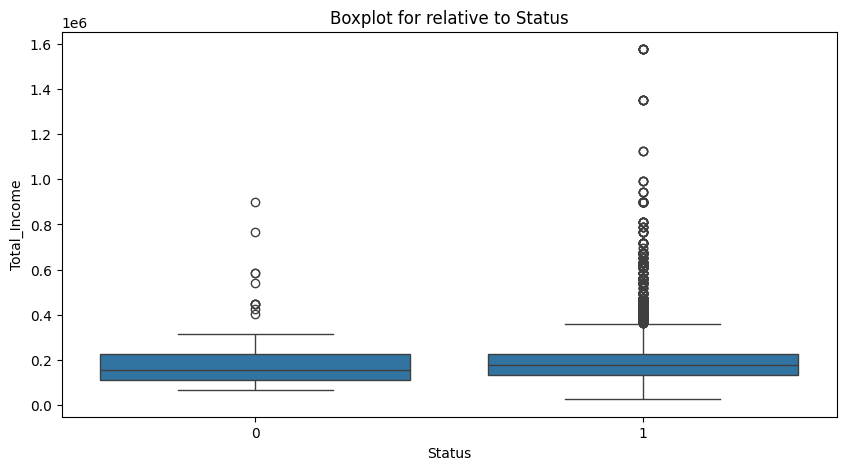

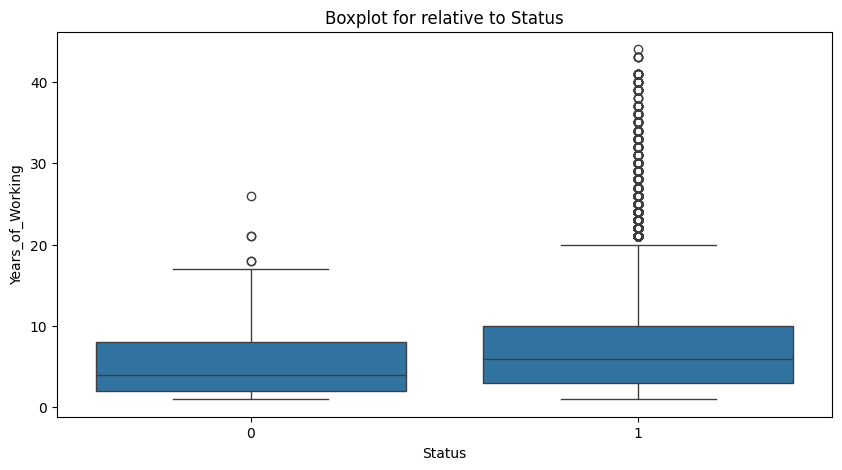

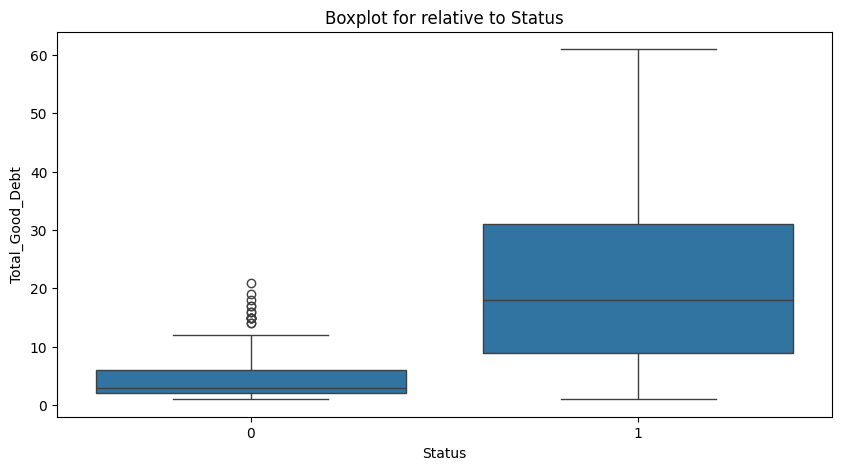

In [ ]:
# Выбираем 3 переменных для анализа
selected_features = ['Total_Income', 'Years_of_Working', 'Total_Good_Debt']

# Построение графиков
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data['Status'], y=data[feature])
    plt.title(f'Boxplot for relative to Status')
    plt.show()